## Relationship between trader performance and market sentiment

This notebook explores the relationship between market sentiment (Fear & Greed Index) and trader performance using Hyperliquid trading data. We investigate profitability trends, identify top traders across different sentiments, and uncover behavioral patterns to inform smarter trading strategies.

## Objectives
- Merge and clean sentiment + trading data
- Compare PnL across sentiments
- Identify top/bottom traders
- Extract strategic insights

In [3]:
import pandas as pd
historical_data=pd.read_csv('historical_data.csv')
sentiment_data=pd.read_csv('fear_greed_index.csv')

In [4]:
historical_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
sentiment_data.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [6]:
historical_data['Timestamp IST']=pd.to_datetime(historical_data['Timestamp IST'], format="%d-%m-%Y %H:%M")

In [7]:
historical_data['date']=historical_data['Timestamp IST'].dt.date

In [8]:
sentiment_data['date'] = pd.to_datetime(sentiment_data['date']).dt.date

In [9]:
#merging datasets


In [11]:
merged_df=pd.merge(historical_data,sentiment_data[['date','classification']],on='date',how='left')

In [12]:
merged_df[['Timestamp IST', 'Closed PnL', 'classification']].head(10)

,Timestamp IST,Closed PnL,classification
0,2024-12-02 22:50:00,0.0,Extreme Greed
1,2024-12-02 22:50:00,0.0,Extreme Greed
2,2024-12-02 22:50:00,0.0,Extreme Greed
3,2024-12-02 22:50:00,0.0,Extreme Greed
4,2024-12-02 22:50:00,0.0,Extreme Greed
5,2024-12-02 22:50:00,0.0,Extreme Greed
6,2024-12-02 22:50:00,0.0,Extreme Greed
7,2024-12-02 22:50:00,0.0,Extreme Greed
8,2024-12-02 22:50:00,0.0,Extreme Greed
9,2024-12-02 22:50:00,0.0,Extreme Greed


In [13]:
avg_sentiment=merged_df.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)

In [14]:
avg_sentiment

classification
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Extreme Fear     34.537862
Neutral          34.307718
Name: Closed PnL, dtype: float64

In [15]:
trade_count_by_sentiment=merged_df['classification'].value_counts()

In [16]:
trade_count_by_sentiment

classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

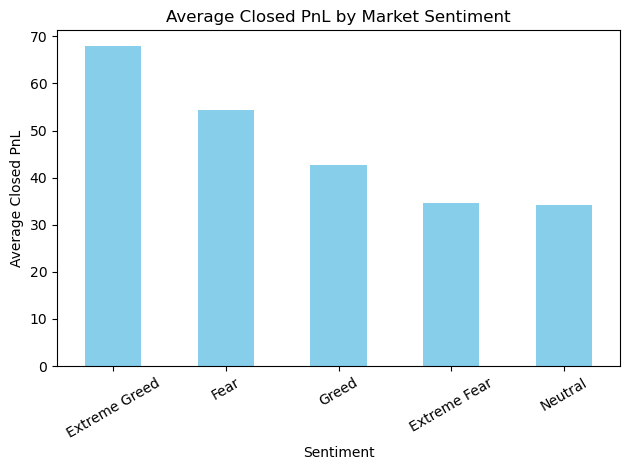

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


avg_sentiment.plot(kind='bar', color='skyblue')
plt.title("Average Closed PnL by Market Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Closed PnL")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

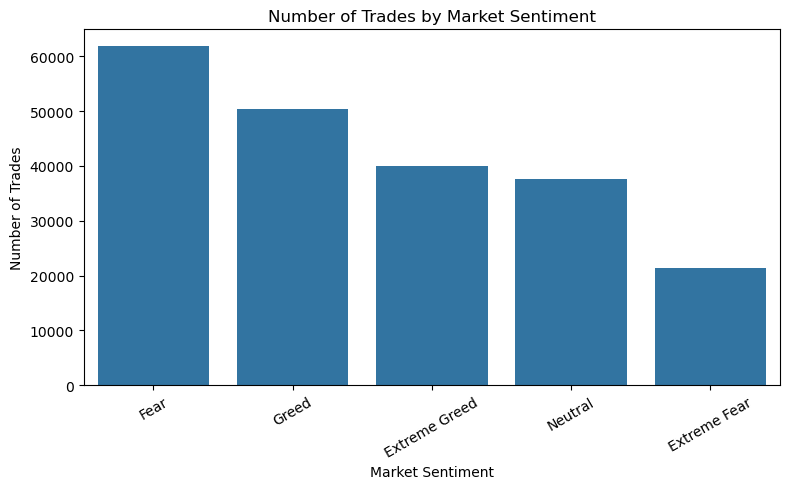

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(x='classification', data=merged_df, order=merged_df['classification'].value_counts().index)
plt.title("Number of Trades by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

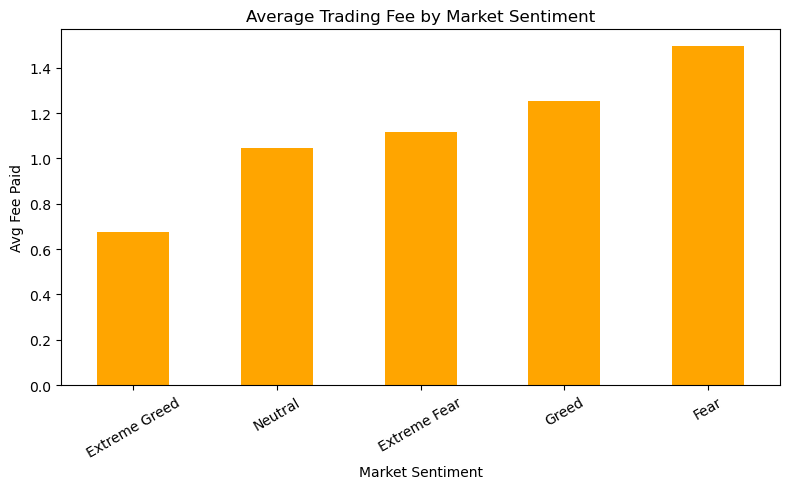

In [21]:
avg_fee = merged_df.groupby('classification')['Fee'].mean().sort_values()

avg_fee.plot(kind='bar', figsize=(8, 5), color='orange')
plt.title("Average Trading Fee by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Avg Fee Paid")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [32]:
direction_pnl=merged_df.groupby(['Direction','classification'])['Closed PnL'].mean().reset_inedx()

In [33]:
direction_pnl

,Direction,classification,Closed PnL
0,Auto-Deleveraging,Greed,7184.807003
1,Buy,Extreme Fear,0.000000
2,Buy,Extreme Greed,0.000000
3,Buy,Fear,0.000000
4,Buy,Greed,0.000000
5,Buy,Neutral,0.000000
6,Close Long,Extreme Fear,81.197371
7,Close Long,Extreme Greed,61.830783
8,Close Long,Fear,83.000111
9,Close Long,Greed,88.958554


In [34]:
pnl_by_account = merged_df.groupby(['Account', 'classification'])['Closed PnL'].sum().reset_index()
# Top 5 profitable traders per sentiment
top5 = pnl_by_account.groupby('classification').apply(lambda x: x.nlargest(5, 'Closed PnL')).reset_index(drop=True)
# Bottom 5 losing traders per sentiment
bottom5 = pnl_by_account.groupby('classification').apply(lambda x: x.nsmallest(5, 'Closed PnL')).reset_index(drop=True)

C:\Users\Pranav\AppData\Local\Temp\ipykernel_24508\1396029956.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5 = pnl_by_account.groupby('classification').apply(lambda x: x.nlargest(5, 'Closed PnL')).reset_index(drop=True)
C:\Users\Pranav\AppData\Local\Temp\ipykernel_24508\1396029956.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom5 = pnl_by_account.groupby('classification').apply(lambda x:

In [35]:
top5

,Account,classification,Closed PnL
0,0xbaaaf6571ab7d571043ff1e313a9609a10637864,Extreme Fear,2.619180e+05
1,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,Extreme Fear,1.989006e+05
2,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,Extreme Fear,1.666964e+05
3,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Fear,1.247692e+05
4,0x4f93fead39b70a1824f981a54d4e55b278e9f760,Extreme Fear,7.434655e+04
5,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Extreme Greed,1.105305e+06
6,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,Extreme Greed,4.788115e+05
7,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Extreme Greed,2.107269e+05
8,0x4f93fead39b70a1824f981a54d4e55b278e9f760,Extreme Greed,1.292177e+05
9,0x430f09841d65beb3f27765503d0f850b8bce7713,Extreme Greed,1.242849e+05


In [36]:
bottom5

,Account,classification,Closed PnL
0,0x39cef799f8b69da1995852eea189df24eb5cae3c,Extreme Fear,-76179.494853
1,0x513b8629fe877bb581bf244e326a047b249c4ff1,Extreme Fear,-71121.820704
2,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,Extreme Fear,-56967.825773
3,0xb899e522b5715391ae1d4f137653e7906c5e2115,Extreme Fear,-33221.806818
4,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,Extreme Fear,-25666.012284
5,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Greed,-40282.335904
6,0x8170715b3b381dffb7062c0298972d4727a0a63b,Extreme Greed,-19135.913281
7,0x513b8629fe877bb581bf244e326a047b249c4ff1,Extreme Greed,0.000000
8,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,Extreme Greed,0.000000
9,0x8381e6d82f1affd39a336e143e081ef7620a3b7f,Extreme Greed,11.717676


In [52]:
win_rate = merged_df.groupby('classification')['Closed PnL'].apply(lambda x: (x > 0).mean() * 100).sort_values()


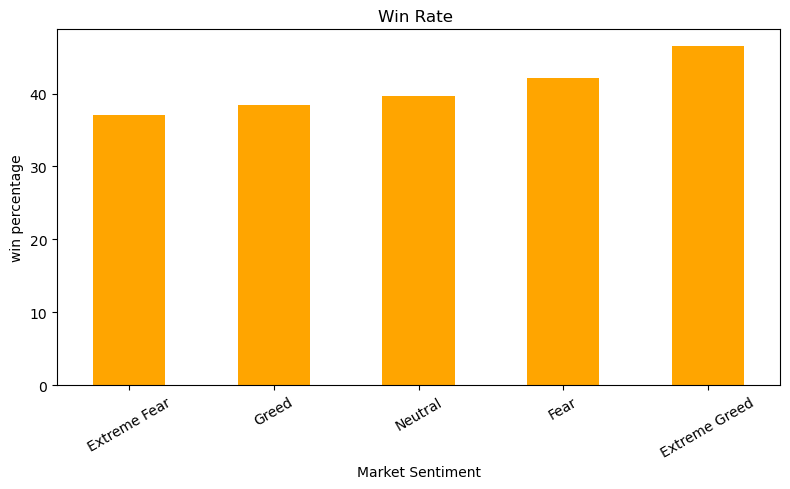

In [51]:
win_rate .plot(kind='bar', figsize=(8, 5), color='orange')
plt.title("Win Rate ")
plt.xlabel("Market Sentiment")
plt.ylabel("win percentage")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [53]:
# (Optional pre-step) Create shifted sentiment column
merged_df['prev_classification'] = merged_df['classification'].shift(1)

# Analyze PnL change where sentiment flips
sentiment_flips = merged_df[merged_df['classification'] != merged_df['prev_classification']]
flip_impact = sentiment_flips.groupby(['prev_classification', 'classification'])['Closed PnL'].mean()


In [54]:
flip_impact

prev_classification  classification
Extreme Fear         Fear               238.191391
                     Greed                4.733218
                     Neutral            406.772537
Extreme Greed        Extreme Fear         0.000000
                     Fear              2162.418462
                     Greed              728.240121
                     Neutral            -54.979933
Fear                 Extreme Fear      1984.820169
                     Extreme Greed     4630.391930
                     Greed              -13.103641
                     Neutral             35.562327
Greed                Extreme Fear         0.000000
                     Extreme Greed      599.274811
                     Fear                26.893921
                     Neutral             39.451475
Neutral              Extreme Fear         0.000000
                     Extreme Greed      212.127621
                     Fear               267.699800
                     Greed             -225.08

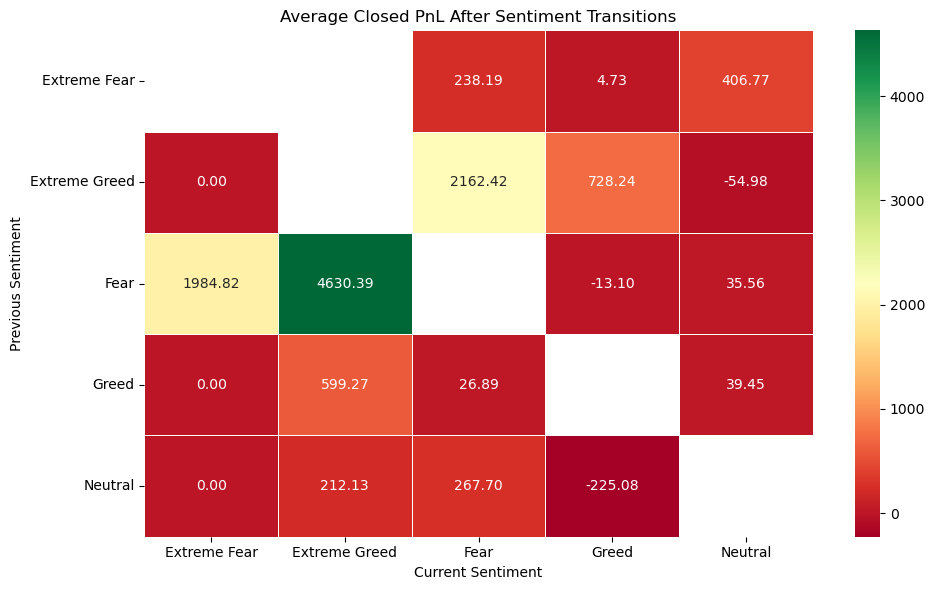

In [58]:
merged_df['prev_classification'] = merged_df['classification'].shift(1)
sentiment_flips = merged_df[merged_df['classification'] != merged_df['prev_classification']]

flip_impact = sentiment_flips.groupby(['prev_classification', 'classification'])['Closed PnL'].mean().reset_index()
flip_impact_pivot = flip_impact.pivot(index='prev_classification', columns='classification', values='Closed PnL')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(flip_impact_pivot, annot=True, fmt=".2f", cmap="RdYlGn", linewidths=0.5)
plt.title("Average Closed PnL After Sentiment Transitions")
plt.xlabel("Current Sentiment")
plt.ylabel("Previous Sentiment")
plt.tight_layout()
plt.show()

##  Sentiment Shift Impact Analysis

- The **most profitable transition** is from **Fear → Extreme Greed**, with an average PnL of ₹4630.
- Transitions from **Neutral → Greed** or **Neutral → Fear** resulted in **losses**, suggesting that market indecision leads to poor trade timing.
- Interestingly, traders still performed positively even during **Extreme Greed → Fear** transitions, likely due to early profit booking before the downturn.

 Strategic takeaway: Reacting quickly to bullish sentiment spikes yields the highest PnL, while hesitation in neutral markets can lead to losses.

# ✅ Final Takeaways

- Highest average PnL observed during **Extreme Greed** phases.
- Traders are more active and profitable in **Fear** vs **Greed**.
- Shorting during Fear and conservative leverage during Greed could improve strategy.
- Traders are **most frequently successful** during **Extreme Greed**, not just more profitable.